<a href="https://colab.research.google.com/github/vaniamusdani/vaniamusdani.github.io/blob/main/LSTM_90_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import math
import numpy as np
import pandas as pd
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# **Import Data**

In [ ]:
df_pg = pd.read_excel('forecastinglstm.xlsx')
df_pg

,Date,Price
0,2018-01-01,12783.678065
1,2018-02-01,12908.028646
2,2018-03-01,12797.553737
3,2018-04-01,12689.833424
4,2018-05-01,12604.199886
...,...,...
65,2023-06-01,13657.195180
66,2023-07-01,13680.269258
67,2023-08-01,13871.605208
68,2023-09-01,14582.197472


In [ ]:
df_pg.info()
df_pg.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    70 non-null     datetime64[ns]
 1   Price   70 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


Date     0
Price    0
dtype: int64

In [ ]:
df_pg = df_pg.dropna()
df_pg.isna().sum()

Date     0
Price    0
dtype: int64

# **Plot Data**

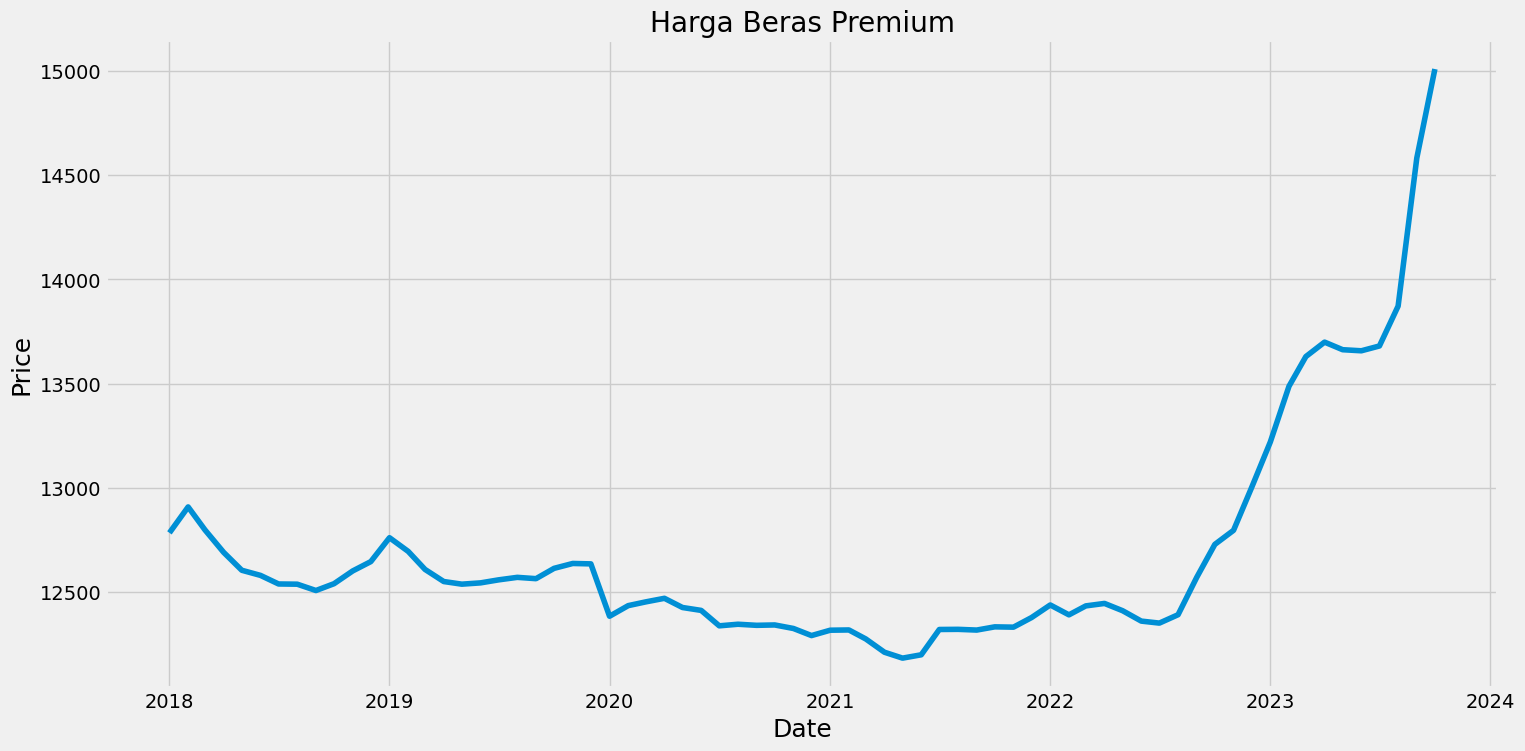

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Harga Beras Premium')
plt.plot(df_pg['Date'],df_pg['Price'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()

## **Data Latih**

In [ ]:
data_pg = df_pg.filter(['Price'])
dataset_pg = data_pg.values
training_data_len_pg = math.ceil(len(dataset_pg)* 0.9)
training_data_len_pg

63

##**MinMax**

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_pg = scaler.fit_transform(dataset_pg)

scaled_data_pg

array([[0.21266513],
       [0.25666161],
       [0.21757448],
       [0.17946196],
       [0.14916395],
       [0.14046477],
       [0.1258774 ],
       [0.12551529],
       [0.11476608],
       [0.12634173],
       [0.14800727],
       [0.16383611],
       [0.20441218],
       [0.18122376],
       [0.15052913],
       [0.13002696],
       [0.12555733],
       [0.12774127],
       [0.13286751],
       [0.13711981],
       [0.13488934],
       [0.15240375],
       [0.16068665],
       [0.15998632],
       [0.07111329],
       [0.0891169 ],
       [0.09546546],
       [0.10154479],
       [0.08593598],
       [0.081011  ],
       [0.05482553],
       [0.0575321 ],
       [0.05568629],
       [0.05631636],
       [0.05032563],
       [0.0383042 ],
       [0.04738926],
       [0.04782724],
       [0.0325592 ],
       [0.01001318],
       [0.        ],
       [0.00565835],
       [0.04861666],
       [0.04887387],
       [0.04762924],
       [0.05309148],
       [0.05256528],
       [0.068

In [ ]:
train_data_pg = scaled_data_pg[0:training_data_len_pg+5, :]

x_train_pg =[]
y_train_pg = []

for i in range (5, len(train_data_pg)):
  x_train_pg.append(train_data_pg[i-5:i, 0])
  y_train_pg.append(train_data_pg[i,0])
  if i <= 5:
    print (x_train_pg)
    print (y_train_pg)

len(x_train_pg)

[array([0.21266513, 0.25666161, 0.21757448, 0.17946196, 0.14916395])]
[0.14046477054225637]


63

In [ ]:
x_train_pg, y_train_pg = np.array(x_train_pg), np.array(y_train_pg)

x_train_pg = np.reshape(x_train_pg, (x_train_pg.shape[0], x_train_pg.shape[1], 1))
x_train_pg.shape

(63, 5, 1)

## **Data Uji**

In [ ]:
test_data_pg = scaled_data_pg[training_data_len_pg - 5:, :]

x_test_pg = []
y_test_pg = dataset_pg[training_data_len_pg:, :]
for i in range(5, len(test_data_pg)):
  x_test_pg.append(test_data_pg[i-5:i,0])
if i <= 5:
    print (x_train_pg)
    print (y_train_pg)

x_test_pg = np.array(x_test_pg)

x_test_pg = np.reshape(x_test_pg, (x_test_pg.shape[0], x_test_pg.shape[1]))
x_test_pg.shape

(7, 5)

# **Membangun Arsitektur LSTM**

In [ ]:
model = Sequential()
model.add(LSTM(150, return_sequences=True, batch_input_shape =(16, x_train_pg.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train_pg, y_train_pg, epochs=200)

Epoch 1/200
2/2 [==============================] - 6s 27ms/step - loss: 0.0442
Epoch 2/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0319
Epoch 3/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0230
Epoch 4/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0157
Epoch 5/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0123
Epoch 6/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0148
Epoch 7/200
2/2 [==============================] - 0s 18ms/step - loss: 0.0143
Epoch 8/200
2/2 [==============================] - 0s 19ms/step - loss: 0.0119
Epoch 9/200
2/2 [==============================] - 0s 20ms/step - loss: 0.0091
Epoch 10/200
2/2 [==============================] - 0s 24ms/step - loss: 0.0081
Epoch 11/200
2/2 [==============================] - 0s 23ms/step - loss: 0.0082
Epoch 12/200
2/2 [==============================] - 0s 21ms/step - loss: 0.0079
Epoch 13/200
2/2 [==============================]

In [ ]:
predictions = model.predict(x_test_pg)
predictions= scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 1s/step


In [ ]:
# menyimpan model
model.save(f'model LSTM 90:10.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## **Error LSTM**

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_percentage_error
model1 = load_model('model LSTM 90:10.h5')

In [ ]:
predictions = model1.predict(x_test_pg)
predictions= scaler.inverse_transform(predictions)

1/1 [==============================] - 1s 804ms/step


In [ ]:
RMSE = np.sqrt(np.mean( predictions - y_test_pg)**2)
print('Nilai RMSE = ', RMSE)
MAPE = mean_absolute_percentage_error(y_test_pg,predictions)*100
print('Nilai MAPE = ', MAPE)

Nilai RMSE =  188.33900182208475
Nilai MAPE =  1.965197105103542


# **Plot Aktual vs Prediksi**

<ipython-input-35-e503ed0156a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Prediksi'] = predictions


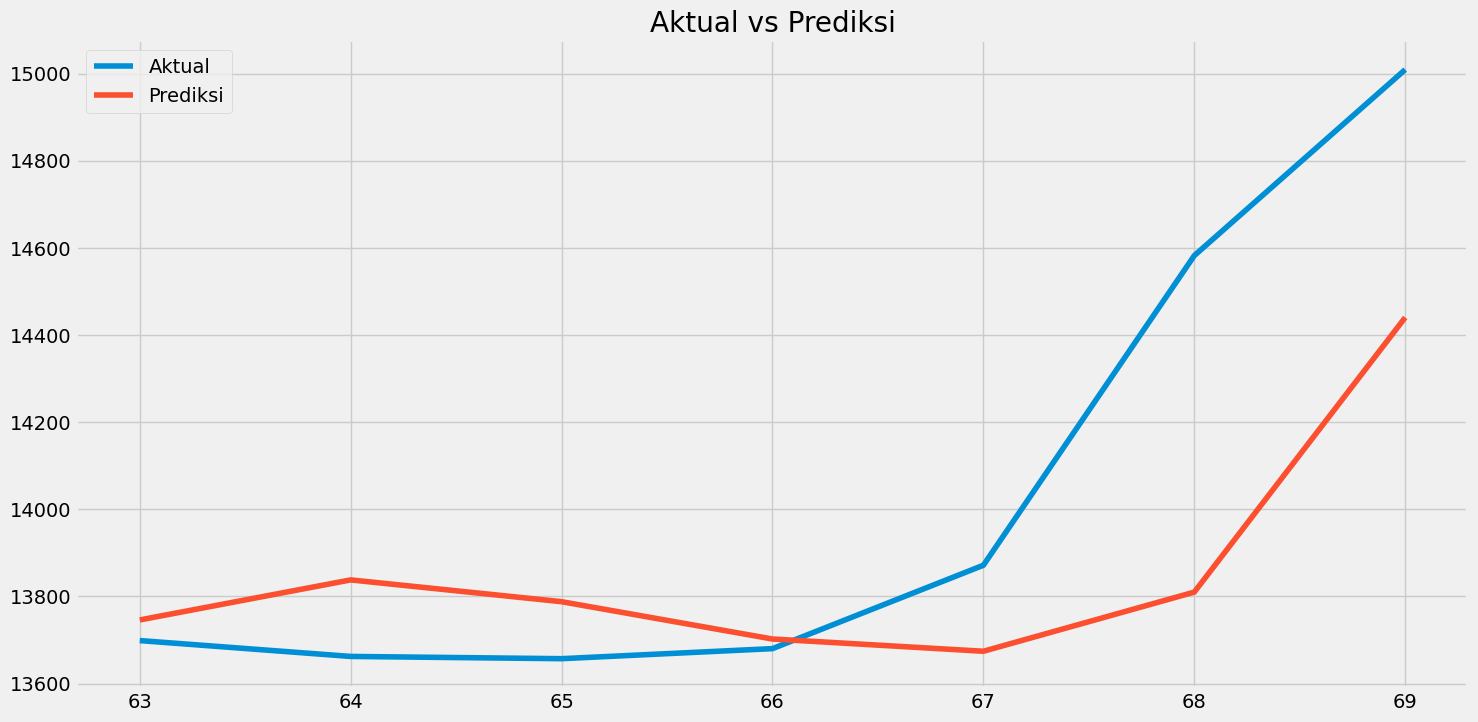

In [ ]:
df1 = data_pg[training_data_len_pg:]
df1['Prediksi'] = predictions
plt.figure(figsize=(16,8))
plt.title('Aktual vs Prediksi')
plt.plot(df1['Price'])
plt.plot(df1['Prediksi'])
plt.legend(['Aktual','Prediksi'],loc="best")

<ipython-input-25-38d8fd2239d2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


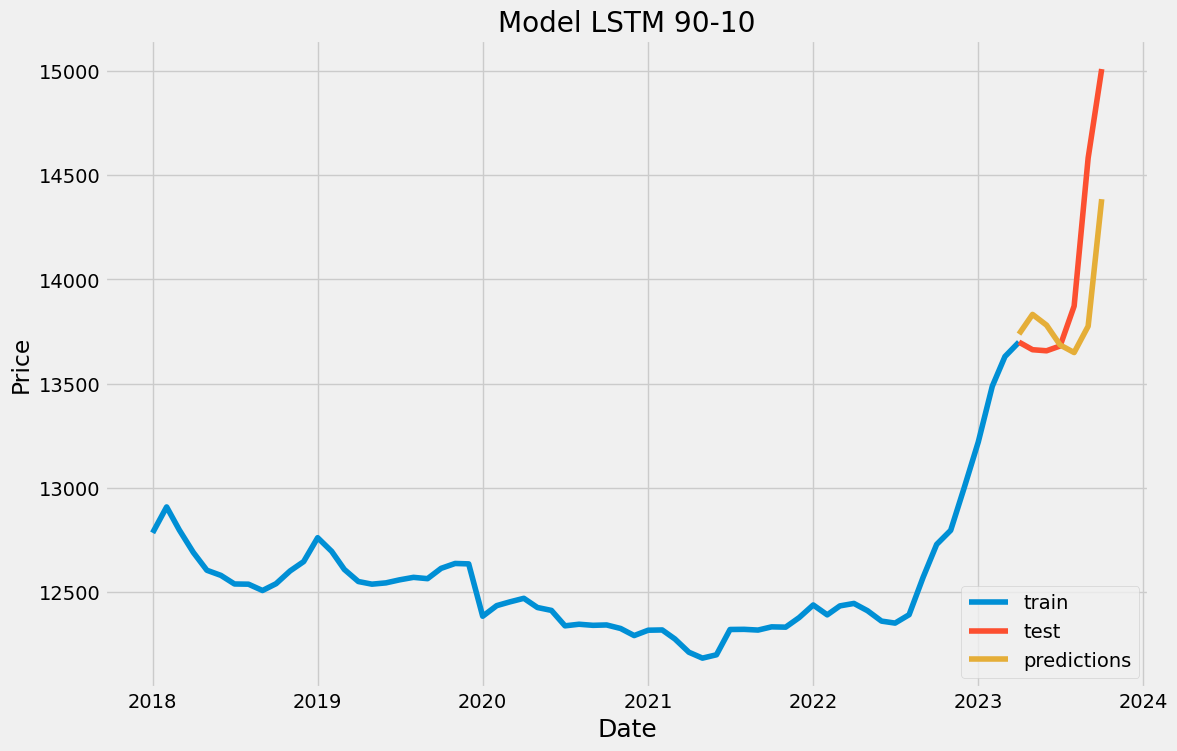

In [ ]:
train = df_pg[:training_data_len_pg+1]
valid = df_pg[training_data_len_pg:]
valid['predictions'] = predictions

plt.figure(figsize=(12,8))
plt.title('Model LSTM 90-10')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price')
plt.plot(train['Date'],train['Price'])
plt.plot(valid['Date'],valid[['Price','predictions']])
plt.legend(['train','test','predictions'], loc='lower right')
plt.show()

In [ ]:
valid
valid.to_excel('Hasil Prediksi LSTM 90:10.xlsx', index = False)